# Projeto 3

Dados Happiness Alcohol Consumption

Pergunta: Qual a relação do PIB com o consumo de álcool e a felicidade?

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm 
from scipy import stats

In [2]:
os.getcwd()

'C:\\Users\\Gabi_XPS\\OneDrive - Insper - Institudo de Ensino e Pesquisa\\INSPER\\2 semestre\\Ciencias dos Dados\\Projeto 3\\CD_Projeto3'

In [3]:
dados = pd.read_excel("HappinessAlcoholConsumption.xls")

In [4]:
#dados

In [5]:
dados_indice = dados.set_index("Country")

In [6]:
### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

Apenas com as variáveis quantitativas desse dataset

In [7]:
dados_indice.columns

Index(['Region', 'Hemisphere', 'HappinessScore', 'HDI', 'GDP_PerCapita',
       'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita'],
      dtype='object')

In [8]:
df = dados_indice[['HappinessScore', 'HDI','GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita','Wine_PerCapita']]

In [9]:
df.describe()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,5.524828,740.877049,91.482836,137.565574,96.598361,66.598361
std,1.148736,149.846124,209.577313,104.817353,81.435028,88.121503
min,3.069000,351.000000,1.029000,1.000000,1.000000,1.000000
25%,4.528250,663.750000,4.134250,38.250000,25.500000,5.000000
50%,5.542000,757.500000,12.016000,125.500000,82.500000,16.000000
75%,6.477000,861.500000,41.990000,224.750000,142.500000,112.750000
max,7.526000,951.000000,953.000000,376.000000,373.000000,370.000000


In [10]:
np.sum(df.isnull())

HappinessScore      0
HDI                 0
GDP_PerCapita       0
Beer_PerCapita      0
Spirit_PerCapita    0
Wine_PerCapita      0
dtype: int64

Ajuste um modelo considerando Indice de Felicidade (HappinessScore) como resposta (dependente) e as demais variáveis da base de dados como explicativas!

In [11]:
Y = df['HappinessScore']

In [12]:
X = df[['HDI','GDP_PerCapita','Beer_PerCapita','Spirit_PerCapita','Wine_PerCapita']]

In [13]:
results = regress(X,Y)
results.summary()

C:\Users\Gabi_XPS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     48.55
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           7.05e-27
Time:                        15:27:08   Log-Likelihood:                -120.66
No. Observations:                 122   AIC:                             253.3
Df Residuals:                     116   BIC:                             270.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4899      0.461      1.063      0.290      -0.423       1.403
HDI                  0.0069      0.001     10.196      0.000       0.006       0.008
GDP_PerCapita        0.0002      0.000      0.672      0.503      -0.000       0.001
Beer_PerCapita       0.0007      0.001      0.912      0.363      -0.001       0.002
Spirit_PerCapita    -0.0014      0.001     -1.655      0.101      -0.003       0.000
Wine_PerCapita      -0.0014      0.001     -1.471      0.144      -0.003       0.000
==============================================================================
Omnibus:                        5.197   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                3.098
Skew:                          -0.185   Prob(JB):                        0.212
Kurtosis:                       2.312   Cond. No.                     5.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
X1 = df[['HDI','Spirit_PerCapita','Wine_PerCapita']]

In [15]:
results = regress(X1,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     81.08
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           1.54e-28
Time:                        15:27:09   Log-Likelihood:                -121.28
No. Observations:                 122   AIC:                             250.6
Df Residuals:                     118   BIC:                             261.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6147      0.357      1.722      0.088      -0.092       1.321
HDI                  0.0069      0.001     12.442      0.000       0.006       0.008
Spirit_PerCapita    -0.0012      0.001     -1.505      0.135      -0.003       0.000
Wine_PerCapita      -0.0010      0.001     -1.197      0.234      -0.003       0.001
==============================================================================
Omnibus:                        5.276   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                3.230
Skew:                          -0.205   Prob(JB):                        0.199
Kurtosis:                       2.317   Cond. No.                     4.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X2 = df[['HDI']]

In [17]:
results = regress(X2,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     237.7
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           3.10e-30
Time:                        15:27:09   Log-Likelihood:                -122.91
No. Observations:                 122   AIC:                             249.8
Df Residuals:                     120   BIC:                             255.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8950      0.306      2.921      0.004       0.288       1.502
HDI            0.0062      0.000     15.416      0.000       0.005       0.007
==============================================================================
Omnibus:                        3.079   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.572
Skew:                          -0.242   Prob(JB):                        0.276
Kurtosis:                       2.479   Cond. No.                     3.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#como o R ao quadrado não diminui tanto ao tirar as variaveis ligadas a bebida, é possivel concluir até agora que o alcool não possui tanta ligação com a felicidade

Vamos considerar Indice de Felicidade (HappinessScore) como variável dependente (eixo y) e consumo de cerveja (Beer_PerCapita) (eixo x).

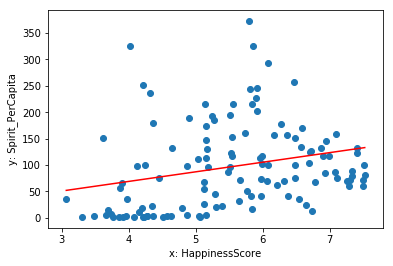

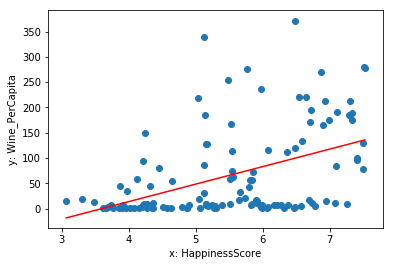

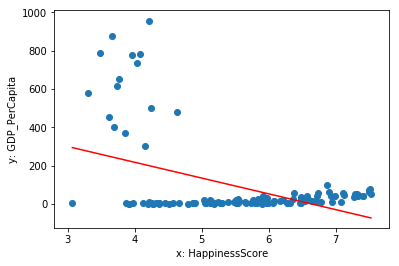

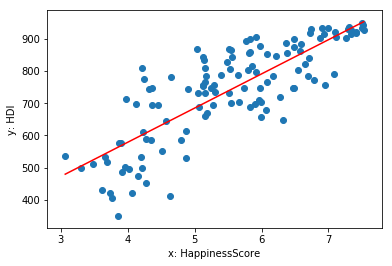

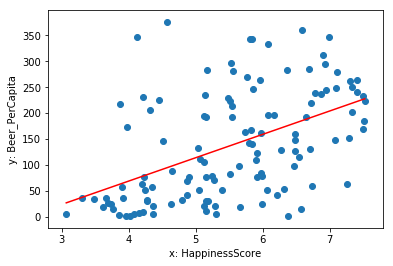

In [33]:
x = df['HappinessScore']
y = df['Spirit_PerCapita']   
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("x: HappinessScore");
plt.ylabel("y: Spirit_PerCapita");
plt.show();


x = df['HappinessScore'] 
y = df['Wine_PerCapita']    
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("x: HappinessScore");
plt.ylabel("y: Wine_PerCapita");
plt.show();

x = df['HappinessScore']
y = df['GDP_PerCapita']    
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("x: HappinessScore");
plt.ylabel("y: GDP_PerCapita");
plt.show();

x = df['HappinessScore'] 
y = df['HDI']   
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("x: HappinessScore");
plt.ylabel("y: HDI");
plt.show();

x = df['HappinessScore'] 
y = df['Beer_PerCapita']    
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("x: HappinessScore");
plt.ylabel("y: Beer_PerCapita");
plt.show();